# Getting started with the `commonroad` extra

To use the code displayed in this Notebook, please install `simple-scenario` with the `commonroad` extra

```bash
pip install simple-scenario[commonroad]
```

Initial imports and definitions

In [1]:
from __future__ import annotations

import matplotlib.pyplot as plt
from pathlib import Path

result_dir = Path("results")

Create a scenario

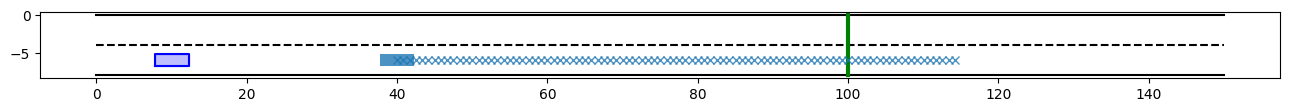

In [2]:
from simple_scenario import Scenario

scenario = Scenario.from_x({
  "scenario_id": "slow_lead_object",
  "road": {
    "n_lanes": 2,
    "lane_width": 4,
    "segments": [
      {
        "length": 150
      }
    ],
    "speed_limit": 120,
    "goal_position": 100,
  },
  "ego_configuration": {
    "lanelet_id": 1000,
    "s0": 10,
    "t0": 0,
    "v0": 22.23,
  },
  "vehicles": [
    {
      "vehicle_id": 0,
      "lanelet_id": 1000,
      "s0": 40,
      "t0": 0,
      "v0": 8.34,
    }
  ],
  "duration": 9,
  "dt": 0.1,
})

# Plot the scenario
f, ax = plt.subplots(figsize=(16, 9))
scenario.render(ax)
ax.set_aspect("equal")
plt.show()

Enables advanced features like feasibility checking of the scenario powered by the [CommonRoad Drivability Checker](https://commonroad.in.tum.de/tools/drivability-checker):

In [3]:
scenario.is_feasible()

True

Enables conversion of simple-scenario scenarios to the [CommonRoad](https://commonroad.in.tum.de/) (CR) format.

Directly save to CR `.xml`

In [4]:
%%capture
scenario.save(result_dir, mode="cr")

Use CR scenario objects through the `cr_interface`.

Create and access the `cr_interface`

In [5]:
cr_interface = scenario.get_cr_interface()
print(type(cr_interface))

<class 'simple_scenario.commonroad_interface.commonroad_interface.CommonroadInterface'>


Get the CR scenario object

In [6]:
cr_scenario = cr_interface.scenario
print(cr_scenario)


Scenario:
- Scenario ID: ZAM_slow_lead_object-0_0_T-0
- Time step size: 0.1
- Number of Obstacles: 1
- Lanelets:
LaneletNetwork consists of lanelets {1000, 1001}, intersections set(), traffic signs {1101}, and traffic lights set()


Get the CR PlanningProblemSet

In [7]:
cr_planning_problem_set = cr_interface.planning_problem_set
print(type(cr_planning_problem_set))

<class 'commonroad.planning.planning_problem.PlanningProblemSet'>


Get the CR LaneletNetwork (wrapped in custom LaneletNetworkWrapper with additional convenience functions)

In [8]:
cr_lanelet_network_wrapper = cr_interface.lanelet_network_wrapper
print(type(cr_lanelet_network_wrapper))

<class 'simple_scenario.lanelet_network_wrapper.lanelet_network_wrapper.LaneletNetworkWrapper'>


E.g., transform a point on the centerline of a lanelet (with ID `lanelet_id`) to the cartesian coordinate frame

In [9]:
lanelet_id = 1000
x, y = cr_lanelet_network_wrapper.from_llt_frenet_to_cart(lanelet_id, s=100, t=0)
print(f"x: {x}, y: {y}")

x: 100.0, y: -6.0


or find the lanelet a certain point is located in

In [10]:
print(cr_lanelet_network_wrapper.find_lanelet_id_by_position(x, y))

1000


## More resources
Please have a look at the other Notebooks in the `tutorials/` folder or directly in the `test/` folder to find out more details about the usage of `simple-scenario`.